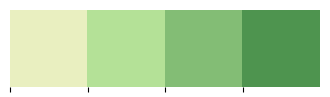

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.express import scatter
import seaborn as sns
import numpy as np


import warnings
warnings.filterwarnings('ignore')

colors_nude = ['#E9EFC0','#B4E197','#83BD75','#4E944F'] #if wandring why greens ?to reinforce the emotion (prediction dollar$)
sns.palplot(sns.color_palette(colors_nude))


# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# see this if allowed  
from sklearn.model_selection import GridSearchCV , learning_curve

In [3]:
df=pd.read_csv('Carbon Emission.csv')

0

In [ ]:
print("The shape of our dataset is ",df.shape)
print()
print()
print("The column names and unique values in each column of the dataset are :",)
print()

print(df.nunique())


In [ ]:
df.head()

In [ ]:
df.isna().sum()

Because the Vehcile Type column has empty entries we assume that the person does not own any vehicle 

In [ ]:
df['Vehicle Type']=df['Vehicle Type'].fillna('No Vehicle')


In [ ]:
df.duplicated().sum()


Let us try to see a basic corelation of the initial data with each other

In [ ]:
df.corr()


In [ ]:
# Calculate correlations
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Heatmap of Feature Correlation')
plt.show()

It only shows corelation of numerical datatypes with each other
Thus we can see Monthly Distance Driven affects carbon emission a lot along with Waste Bag Weekly Count

Let us see numerical description of the data

In [ ]:
df.describe()


Try to write some infernce

Now we have seen the relationship of numerical data with Carbon Emission
Now let us see the relationship of categorical data

In [ ]:
# we remove the numerical datatype columns
categorical_columns = list(df.columns[df.dtypes == 'object'])
# print(li)

In [ ]:
# we remove  these 2 columns as they have list which contains what type of things they do
#  we will evaulate these in the end
categorical_columns.remove('Recycling')
categorical_columns.remove('Cooking_With')
print(categorical_columns)


In [ ]:

for categorical_column in categorical_columns:
 region_cost= df.groupby(categorical_column)['CarbonEmission'].mean() 
 fig = plt.figure(figsize=(8,4))
 sns.barplot(x=region_cost.index, y=region_cost.values, color=colors_nude[-1])
 plt.title(str(categorical_column)+' Vs Carbon Emission' ,size = 15)
 plt.ylabel('Carbon Emission')
 plt.show()

From the above plots we can say :

1 -> as weight of person increase the Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 
    
2 -> Males generally have more carbon emission then females 
    Thus we should use a ordinal encoding to encode this feature 

3 -> as meat prefernce of person increase the Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 

4 -> as the freuency of shower of person increase the Carbon Emission of the person also increases slightly 
    Thus we should use a ordinal encoding to encode this feature or we may also drop this feature 

5 -> as  the person use a good source of energy the Carbon Emission of the person also decreases
    Thus we should use a ordinal encoding to encode this feature 

6 -> if person used personal vehcile to commute Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 

7 -> if person uses a bad source of fuel Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 

8 -> Social activity increases carbon emisison of person
    Thus we should use a ordinal encoding to encode this feature 

9 -> as frequecny of air travel of person increase the Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 

10 -> as waste bag size of person increase the Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 


11 -> as person used more eneryg effiecnt things Carbon Emission of the person also decreases slightly
    Thus we should use a ordinal encoding to encode this feature or drop this feature

Thus we can say almost all categorcial data are ordinal and this is slef explanatory as we want the perosn to knpow the carbon emission without use heavy data points and just by simple metrices




Now Let us see relationship of the leftover 2 columns 

In [ ]:
# this contains the things the people recycle
list_recycling=['Paper','Metal','Glass','Plastic']
# and the columns contain what things the perons recycle from the above 4 

# this will contain how many person recycle the product
count_recycle = np.zeros(4)

# this will contain the total carbon emission of the person with sepcifc thing to recycle 
sum_carbon=np.zeros(4)
for i in range(10000):
    for j in range(4):
        if list_recycling[j] in df['Recycling'][i]:
            count_recycle[j]=count_recycle[j]+1
            sum_carbon[j]=sum_carbon[j]+df['CarbonEmission'][i]

In [ ]:
categories = ['Paper','Metal','Glass','Plastic']
counts = sum_carbon/count_recycle

# Create bar plot
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Materials')
plt.ylabel('Carbon Emission')
plt.title('Material Vs Emission Mean')

# Show plot
plt.show()

We can see mean carbon emission is same for all 

Thus it may not be the best idea to separate make dummies of these entires and make 0 ,1 to represnt whether the person recycle the particular item

Instead we add the total number of items person recycle and see how it goes 

In [ ]:
def count_elements(string):
    # Remove the brackets and split the string by commas
    elements = string.strip("[]").split(", ")
    # Count the number of elements
    return len(elements)


In [ ]:
# as we saw that no major difference in seeing for different recycling things we see how many things the [person recycle

df['Recycling_count'] = df['Recycling'].apply(count_elements)

region_cost= df.groupby('Recycling_count')['CarbonEmission'].mean() 
fig = plt.figure(figsize=(8,4))
sns.barplot(x=region_cost.index, y=region_cost.values, color=colors_nude[-1])
plt.title('Recycling_count'+' Vs Carbon Emission' ,size = 15)
plt.ylabel('Carbon Emission')
plt.show()

Here it is not same for all 

it decreases monotonically as the number of products recycled by person increases

Thus it is good to use this instead of making dummies  

In [ ]:
# this contains the things  people cook with
Cooking_With=['Microwave','Airfryer','Oven','Stove','Grill']
# this will contain how many items person use 
count_Cooking_With = np.zeros(5)
# this will contain the total carbon emission of the person with sepcifc thing 
sum_Cooking_With=np.zeros(5)
for i in range(10000):
    for j in range(5):
        if Cooking_With[j] in df['Cooking_With'][i]:
            count_Cooking_With[j]=count_Cooking_With[j]+1
            sum_Cooking_With[j]=sum_Cooking_With[j]+df['CarbonEmission'][i]

In [ ]:
categories=['Microwave','Airfryer','Oven','Stove','Grill']
counts = sum_Cooking_With/count_Cooking_With

# Create bar plot
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Cooking_With')
plt.ylabel('Carbon Emission')
plt.title('Cooking_With Vs Emission Mean')

# Show plot
plt.show()

We can see mean carbon emission is same for all 

Thus it may not be the best idea to separate make dummies of these entires and make 0 ,1 to represnt whether the person used the particular item just as we saw above

Instead we add the total number of items person uses and see how it goes 

In [ ]:


# as we saw that no major difference in seeing for different recycling things we see how many things the [person recycle

df['Cook_count'] = df['Cooking_With'].apply(count_elements)

region_cost= df.groupby('Cook_count')['CarbonEmission'].mean() 
fig = plt.figure(figsize=(8,4))
sns.barplot(x=region_cost.index, y=region_cost.values, color=colors_nude[-1])
plt.title('Cook_count'+' Vs Carbon Emission' ,size = 15)
plt.ylabel('Carbon Emission')
plt.show()


Here though it is not same for all 

it increase monotonically as the number of products used for cook increase

But difference is less

In [ ]:
# the scatter plots not used 


So let us start  with Feature Engineering an make changes that we saw above

We have already encoded the 2 columns for Recycling and Cook item
We just drop the 2 orihinal columns

In [ ]:
df.drop(columns = ['Recycling', 'Cooking_With'], axis = 1 , inplace = True)

Now let us encode the categorical columns we abopve saw with ordinal encoding 

In [ ]:
def ordinal_encode_df(dff, order=None):
    mapping = {}
    encoded_df = pd.DataFrame()
    
    # we will use our own order to encode 
    for col in dff.columns:
        if order and col in order:
            unique_categories = order[col]
        else:
            unique_categories = sorted(dff[col].unique())  # Get unique categories and sort them
            
        category_mapping = {category: idx for idx, category in enumerate(unique_categories)}
        mapping[col] = category_mapping
        encoded_df[col] = dff[col].map(category_mapping)
    
    return encoded_df, mapping

In [ ]:
orders = {
    'Body Type': {'overweight': 2, 'obese':3, 'underweight': 0, 'normal': 1},
'Sex': {'female': 0, 'male': 1}, 
'Diet': {'pescatarian': 0, 'vegetarian': 1, 'omnivore': 2, 'vegan': 3},
'How Often Shower': {'daily': 1, 'less frequently': 0, 'more frequently': 3, 'twice a day': 2},
'Heating Energy Source': {'coal':3, 'natural gas': 1, 'wood': 2, 'electricity': 0},
'Transport': {'public': 1, 'walk/bicycle': 0, 'private': 2},
'Vehicle Type': { 'no_vehicle': 0, 'petrol': 5, 'diesel': 4, 'hybrid': 3, 'lpg': 2, 'electric': 1},
'Social Activity': {'often': 2, 'never': 0, 'sometimes': 1},
'Frequency of Traveling by Air': {'frequently': 2, 'rarely': 1, 'never': 0, 'very frequently': 3},
'Waste Bag Size': {'large': 2, 'extra large': 3, 'small': 0, 'medium': 1},
'Energy efficiency': {'No': 2, 'Sometimes': 1, 'Yes': 0}
}

df_encoded = df.copy()

df_encoded, mapping = ordinal_encode_df(df_encoded, order=orders)


In [ ]:
df_encoded['Vehicle Type']=df_encoded['Vehicle Type'].fillna(0)
df_encoded.head()

Now we encode the data in all numerical so let use see the corelation

In [ ]:
df_encoded.corr()


In [ ]:
# Calculate correlations
corr = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm')

plt.title('Heatmap of Feature Correlation')
plt.show()

We can see that Vehicle distance depends on Vehicle type and and transport

Also We can see more corelation of featiures with Carbon emision

In [ ]:
df_encoded.describe()


almost for every feature mean is min + max by 2 thus good data distibution
except vehcile type as 0 for many  and air freq, vehcule monthly km and thus carbon emission is not mean , 
cook count and recycle also not folllow this 

In [ ]:

df_encoded.corr()['CarbonEmission']  


as corelation for some feature is very less thus we can remove how often shower ,social activity(diffcilut otjudege) , how long pc , how long intenrt , neergy effieicent, cook count in linear models

In [ ]:
# # removing column whose correlation with 'Carbon emmision' is very low for linear models 
# df_encoded=df_encoded.drop(columns=['How Long TV PC Daily Hour','How Long Internet Daily Hour', 'How Often Shower', 'Social Activity',  'Cook_count', 'Energy efficiency'])

# df_normlaised['total_hrs_on_gadgets']=df_normlaised['How Long TV PC Daily Hour']+df['How Long Internet Daily Hour']
# df_normlaised=df_normlaised.drop(columns=['How Long TV PC Daily Hour','How Long Internet Daily Hour'])


In [ ]:



# Manually encode categorical columns
def normalise_data(df, columns):
   for col in columns:
      # Find the maximum value in the column
      diff = df[col].max() - df[col].min()
      
      # Divide each value in the column by its maximum value
      df[col] = df[col] / diff
   
   return df


In [ ]:

# normalization
columns_to_normlaise = ['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count',
                     'How Many New Clothes Monthly', 'How Long TV PC Daily Hour','How Long Internet Daily Hour']  # Add your column names here

df_normlaised = normalise_data(df_encoded, columns_to_normlaise)

In [ ]:
# moving CarbonEmission column at last

# Extract the column
column_to_move = df_normlaised.pop('CarbonEmission')

# Re-insert the column at the last position
df_normlaised['CarbonEmission'] = column_to_move

In [ ]:
df_normlaised

In [ ]:
# Calculate correlations
corr = df_normlaised.corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm')

plt.title('Heatmap of Feature Correlation')
plt.show()

In [ ]:
df_normlaised.corr()['CarbonEmission']

# Important Functions

In [ ]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    
 
    # Check if random_state is provided
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle indices
    indices = np.random.permutation(len(X))
    
    # Calculate the number of samples in the test set
    test_samples = int(len(X) * test_size)
    
    # Split indices into train and test sets
    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]
    
    # Split the data into train and test sets based on indices
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test


In [ ]:
def mean_absolute_error(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

def r_squared(y_true, y_pred):
    y_bar = np.mean(y_true)
    ss_total = np.sum((y_true - y_bar) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared


# XG Boost

In [ ]:
import xg

In [ ]:
class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=10, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            indices = np.random.choice(len(X), len(X), replace=True)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros(len(X))
        for tree in self.trees:
            predictions += tree.predict(X)
        return predictions / self.n_estimators


## Applying Random Forest without doing feature engineering


In [ ]:
df

In [ ]:
numeric_columns = df.select_dtypes(exclude=['object'])

numeric_columns = numeric_columns.drop(columns=['Recycling_count', 'Cook_count'], axis = 1)


In [ ]:
numeric_columns

In [ ]:
X=numeric_columns.iloc[:,0:5].values

In [ ]:
X

In [ ]:
Y=numeric_columns.iloc[:,-1].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, 0.2,10)

In [ ]:
# Initialize and fit the Random Forest model
rf_model = xg.XGBoostRegressor()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Assuming y_true contains the true target values and y_pred contains the predicted values
# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)

# Compute R-squared (R²)
r2_squared = r_squared(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r2_squared)

## Random Forest after feature engineering (converting all categorical column to numerical column)

In [ ]:
df_encoded.shape

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_encoded.iloc[:,0:18].values,df_encoded.iloc[:,-1].values, 0.2,10)


In [ ]:
# Initialize and fit the Random Forest model
rf_model = xg.XGBoostRegressor()
rf_model.fit(X_train1, y_train1)

# Make predictions
y_pred1 = rf_model.predict(X_test1)

In [ ]:
# Assuming y_true contains the true target values and y_pred contains the predicted values
# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test1, y_pred1)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test1, y_pred1)

# Compute Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test1, y_pred1)

# Compute R-squared (R²)
r2_squared = r_squared(y_test1, y_pred1)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r2_squared)

## On Normalised Dataset

In [102]:
df_normlaised.shape

(10000, 20)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(df_normlaised.iloc[:,0:18].values,df_normlaised.iloc[:,-1].values, 0.2,10)


In [104]:
# Initialize and fit the Random Forest model
rf_model = xg.XGBoostRegressor()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [105]:
# Assuming y_true contains the true target values and y_pred contains the predicted values
# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)

# Compute R-squared (R²)
r2_squared = r_squared(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r2_squared)

Mean Absolute Error: 268.9725907868724
Mean Squared Error: 108791.65224106541
Root Mean Squared Error: 329.8357958758652
R-squared (R²): 0.84164928322474
